In [1]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r'D:\data\Data_Train.xlsx')
df.head()

TITLE  RESTAURANT_ID  \
0      CASUAL DINING           9438   
1  CASUAL DINING,BAR          13198   
2      CASUAL DINING          10915   
3        QUICK BITES           6346   
4     DESSERT PARLOR          15387   

                                     CUISINES  \
0                 Malwani, Goan, North Indian   
1              Asian, Modern Indian, Japanese   
2  North Indian, Chinese, Biryani, Hyderabadi   
3                            Tibetan, Chinese   
4                                    Desserts   

                                     TIME     CITY        LOCALITY RATING  \
0  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)    Thane  Dombivali East    3.6   
1                    6pm – 11pm (Mon-Sun)  Chennai       Ramapuram    4.2   
2     11am – 3:30pm, 7pm – 11pm (Mon-Sun)  Chennai      Saligramam    3.8   
3                 11:30am – 1am (Mon-Sun)   Mumbai     Bandra West    4.1   
4                    11am – 1am (Mon-Sun)   Mumbai     Lower Parel    3.8   

       VOTES  COST  
0   49 votes  1200  
1   30 votes  1500  
2  221 votes   800  
3   24 votes   800  
4  165 votes   300

* TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

* RESTAURANT_ID: A unique ID for each restaurant.

* CUISINES: The variety of cuisines that the restaurant offers.

* TIME: The open hours of the restaurant.

* CITY: The city in which the restaurant is located.

* LOCALITY: The locality of the restaurant.

* RATING: The average rating of the restaurant by customers.

* VOTES: The overall votes received by the restaurant.

* COST: The average cost of a two-person meal.

In [3]:
df.shape

(12690, 9)

df.columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [5]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

* The dataset has shape with 12690 rows & 9 columns.
* The dataset has 2 int64 & 7 object as datatype columns.
* The dataset has null values in 4 columns.

In [6]:
# Summary Statistic

In [7]:
df.describe(include='all')

TITLE  RESTAURANT_ID      CUISINES                   TIME  \
count         12690   12690.000000         12690                  12690   
unique          113            NaN          4155                   2689   
top     QUICK BITES            NaN  South Indian  11am – 11pm (Mon-Sun)   
freq           4218            NaN           532                   1415   
mean            NaN    7759.134121           NaN                    NaN   
std             NaN    4504.874150           NaN                    NaN   
min             NaN       0.000000           NaN                    NaN   
25%             NaN    3863.250000           NaN                    NaN   
50%             NaN    7740.000000           NaN                    NaN   
75%             NaN   11688.750000           NaN                    NaN   
max             NaN   15573.000000           NaN                    NaN   

           CITY    LOCALITY RATING     VOTES          COST  
count     12578       12592  12688     11486  12690.000000  
unique      359        1416     32      1847           NaN  
top     Chennai  Gachibowli    3.9  44 votes           NaN  
freq       2174         166   1238        71           NaN  
mean        NaN         NaN    NaN       NaN    655.252246  
std         NaN         NaN    NaN       NaN    627.003540  
min         NaN         NaN    NaN       NaN     20.000000  
25%         NaN         NaN    NaN       NaN    300.000000  
50%         NaN         NaN    NaN       NaN    500.000000  
75%         NaN         NaN    NaN       NaN    800.000000  
max         NaN         NaN    NaN       NaN  14000.000000

* The column cost has maximum is 14000 and minimum 20 cost for the food.
* The most common tittle is QUICK BITES for Restaurant i.e 4218 Restaurant use this name.
* The data has most Restaurant from Chennai.
* The Rating for most of the Restaurant is 3.9.
* The South Indian  Cuisines are most famous as 532  restaurant serves them.
* The locality Gachibowli has most Restaurant i.e 166.

In [8]:
# Data Visualation

In [9]:
df.isnull().head()

TITLE  RESTAURANT_ID  CUISINES   TIME   CITY  LOCALITY  RATING  VOTES  \
0  False          False     False  False  False     False   False  False   
1  False          False     False  False  False     False   False  False   
2  False          False     False  False  False     False   False  False   
3  False          False     False  False  False     False   False  False   
4  False          False     False  False  False     False   False  False   

    COST  
0  False  
1  False  
2  False  
3  False  
4  False

In [10]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [11]:
sns.heatmap(df.isnull())

In [12]:
# Replace the Null values.

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imp=SimpleImputer(strategy='most_frequent')
df['RATING']=imp.fit_transform(df['RATING'].values.reshape(-1,1))

In [15]:
df['CITY']=imp.fit_transform(df['CITY'].values.reshape(-1,1))

In [16]:
df['LOCALITY']=imp.fit_transform(df['LOCALITY'].values.reshape(-1,1))

In [17]:
df['VOTES']=imp.fit_transform(df['VOTES'].values.reshape(-1,1))

In [18]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

* All the null values are removed from the dataset.

In [19]:
df.corr()

RESTAURANT_ID     COST
RESTAURANT_ID        1.00000  0.04071
COST                 0.04071  1.00000

In [20]:
 # Visualization  univarient and bivarient 

In [21]:
df['COST'].plot.hist()
mean_val=np.mean(df['COST']);
plt.axvline(mean_val,linewidth=4,color='red',label='Mean COST')
plt.xlabel('COST')
plt.ylabel('count')
plt.legend()
plt.show()
print(df['COST'].mean())

655.2522458628841


* The mean cost of the Food in the Restaurant is 655.25.

QUICK BITES       4218
CASUAL DINING     3652
None              1003
CAFÉ               607
DESSERT PARLOR     382
Name: TITLE, dtype: int64


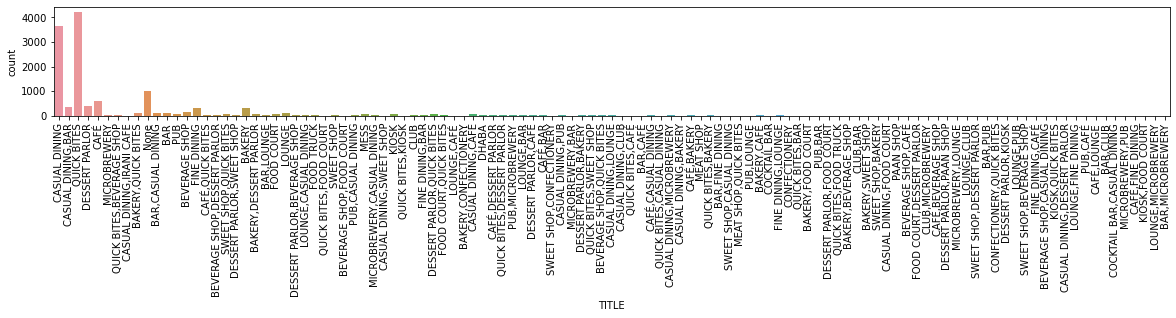

In [22]:
plt.figure(figsize=(20,2))
sns.countplot(df['TITLE'])
plt.xticks(rotation=90)
print((df['TITLE'].value_counts()).head())

* The top 3 names of the restaurants are QUICK BITES i.e 4218, CASUAL DINING i.e 3652 & CAFÉ i.e 607.



South Indian             532
North Indian             526
North Indian, Chinese    501
Fast Food                286
Chinese                  167
Name: CUISINES, dtype: int64


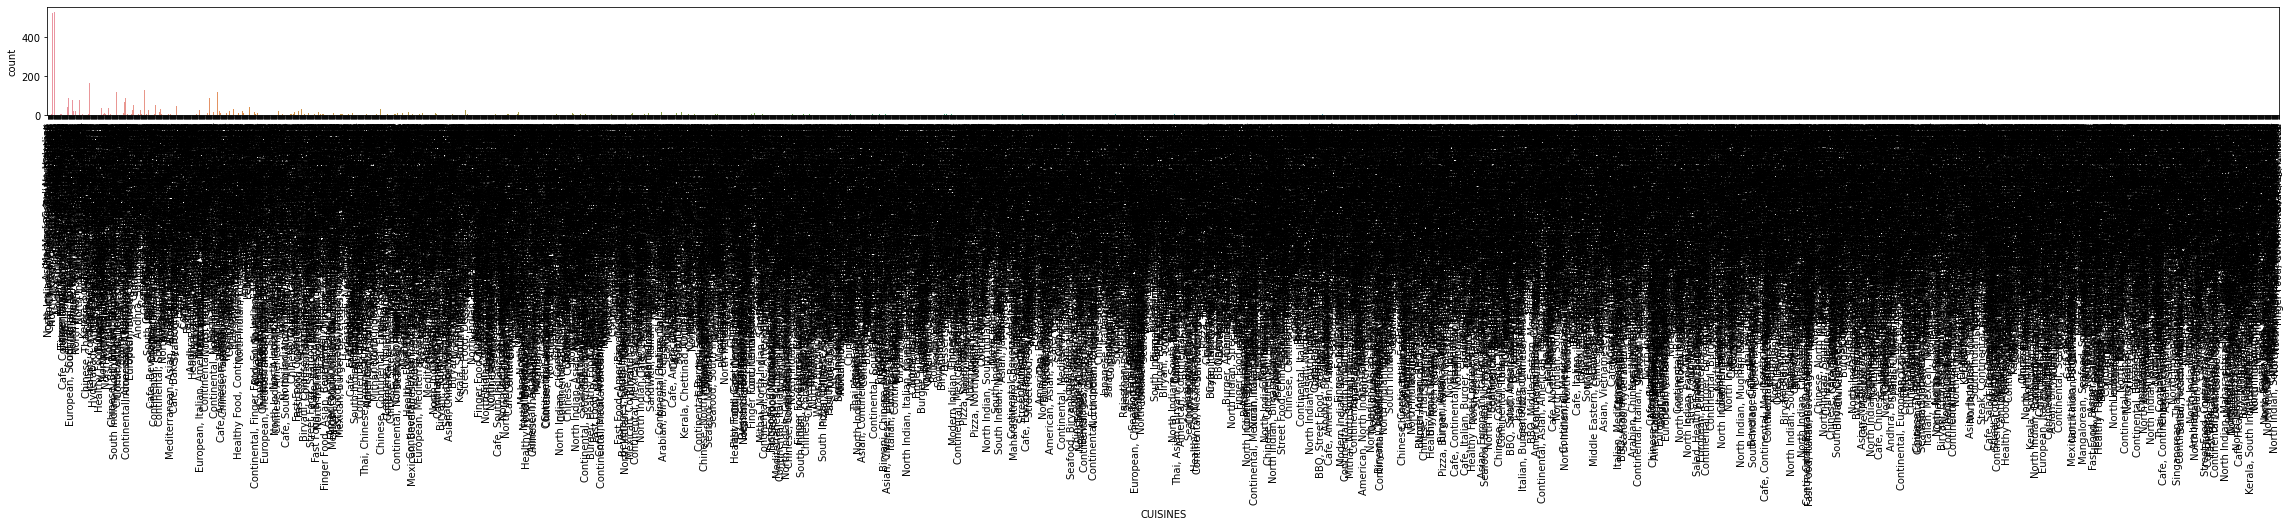

In [23]:
plt.figure(figsize=(40,2))
sns.countplot(df['CUISINES'])
plt.xticks(rotation=90)
print((df['CUISINES'].value_counts()).head())

* The most popular top 3 Cuisines are South Indian i.e 532,North Indian i.e 526 & North Indian, Chinese i.e 501.

11am – 11pm (Mon-Sun)            1415
12noon – 12midnight (Mon-Sun)     469
12noon – 11pm (Mon-Sun)           407
11am – 12midnight (Mon-Sun)       310
10am – 10pm (Mon-Sun)             221
Name: TIME, dtype: int64


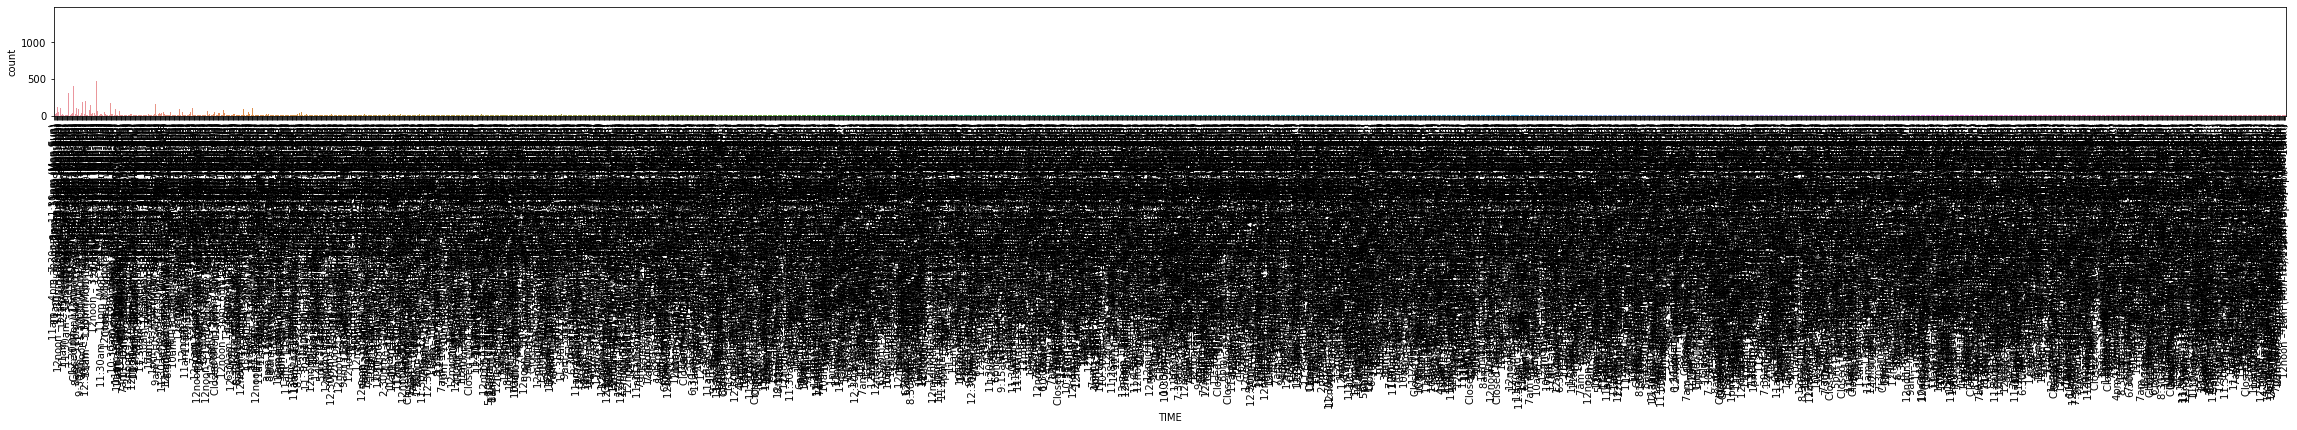

In [24]:
plt.figure(figsize=(40,2))
sns.countplot(x='TIME',data=df)
plt.xticks(rotation=90)
print((df['TIME'].value_counts()).head())

* The most common top 3 timings are 11am – 11pm (Mon-Sun) i.e 1415, 12noon – 12midnight (Mon-Sun) i.e 469 & 12noon – 11pm (Mon-Sun) i.e 407.

Chennai      2286
Bangalore    2149
Hyderabad    1819
Mumbai       1722
New Delhi    1321
Name: CITY, dtype: int64


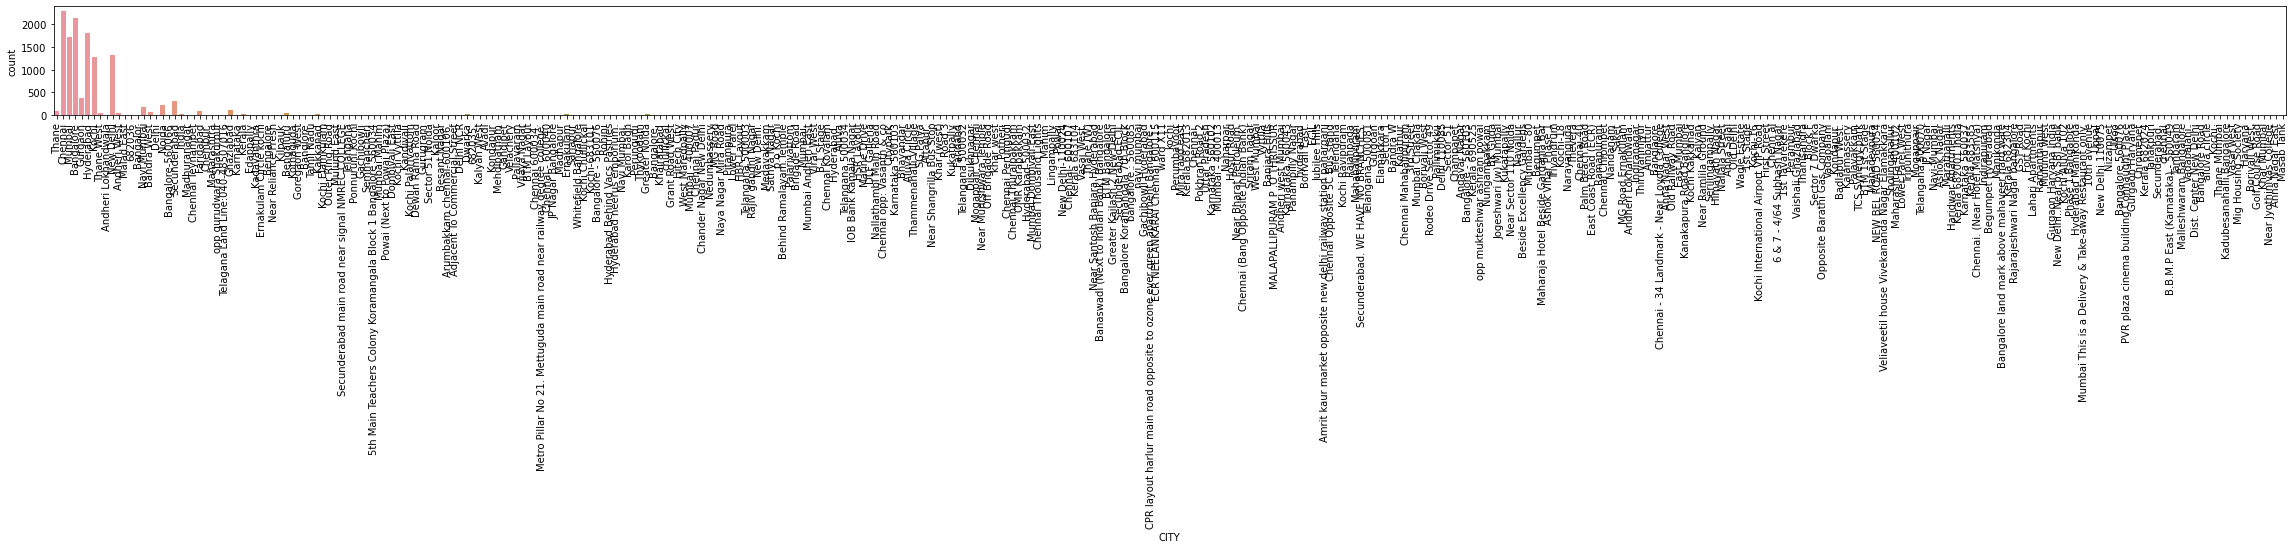

In [25]:
plt.figure(figsize=(40,2))
sns.countplot(df['CITY'])
plt.xticks(rotation=90)
print((df['CITY'].value_counts()).head())

* The top 3 places with most restaurants are Chennai i.e 2286 , Bangalore i.e 2149 & Hyderabad i.e 1819.

Gachibowli     264
Indiranagar    138
Edappally      122
Kakkanad       121
HSR            120
Name: LOCALITY, dtype: int64


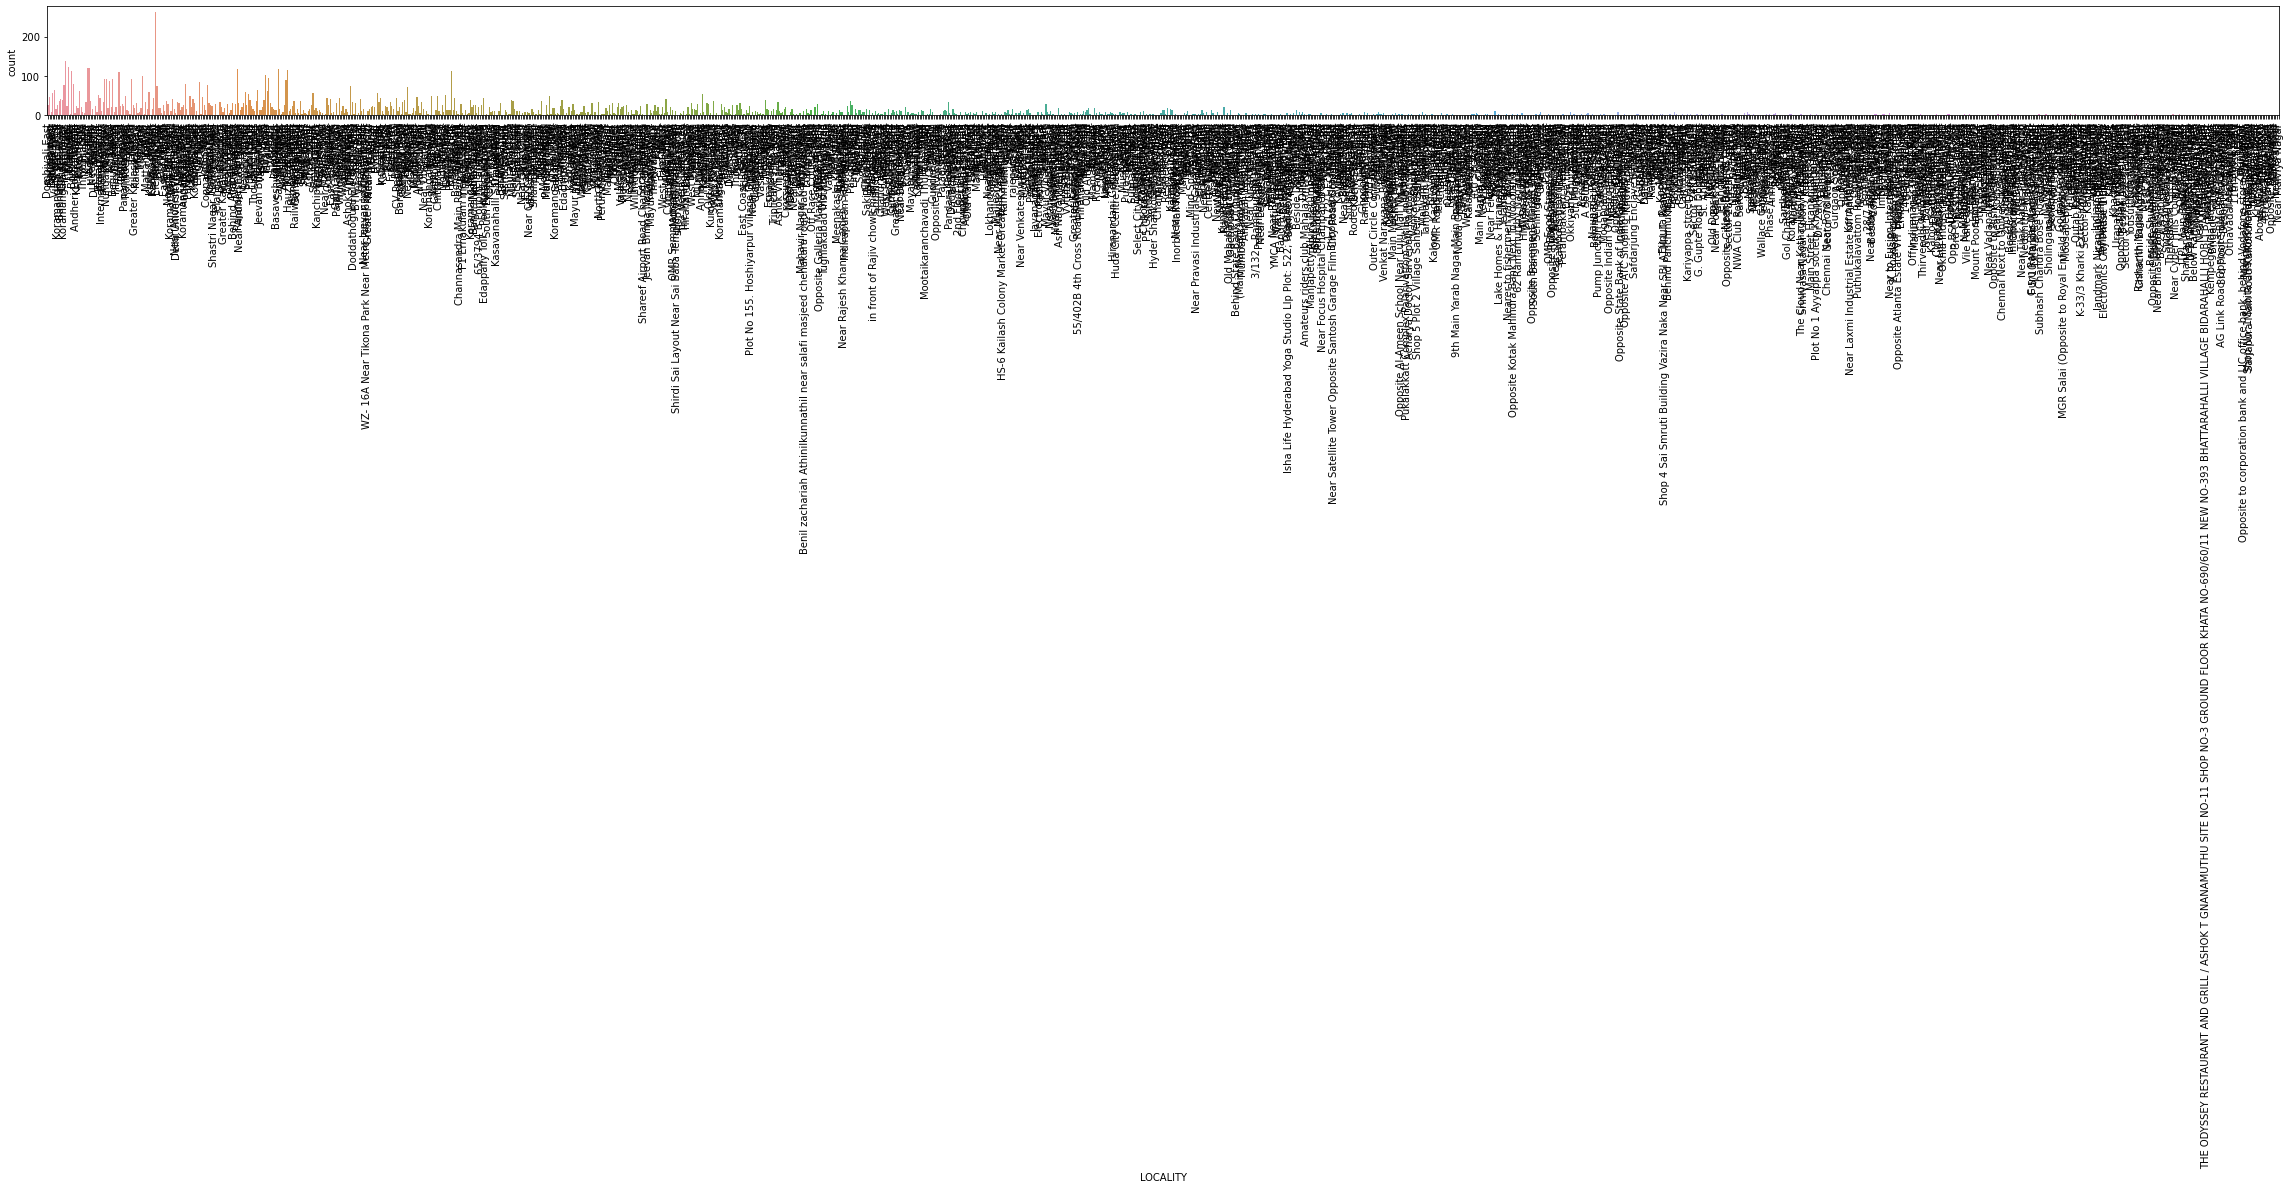

In [26]:
plt.figure(figsize=(40,2))
sns.countplot(df['LOCALITY'])
plt.xticks(rotation=90)
print((df['LOCALITY'].value_counts()).head())

* The locality with most restaurant are Gachibowli i.e 264, Indiranagar i.e 138 & Edappally i.e 122.

3.9    1240
3.8    1190
4.0    1099
3.7    1086
3.6     951
Name: RATING, dtype: int64


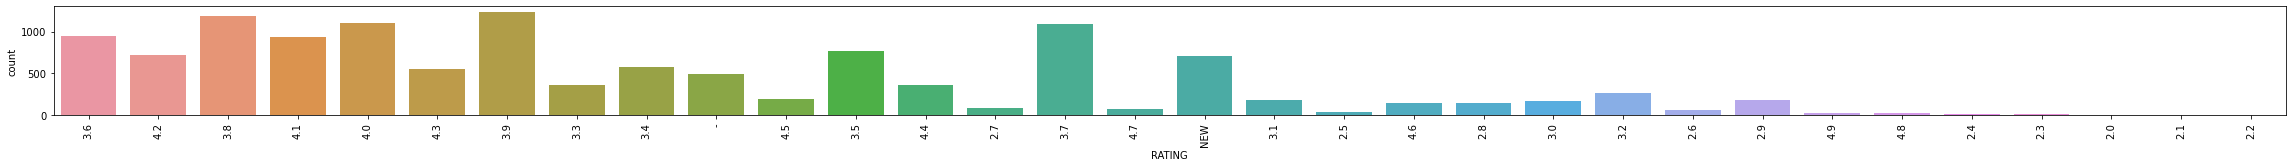

In [27]:
plt.figure(figsize=(40,2))
sns.countplot(df['RATING'])
plt.xticks(rotation=90)
print((df['RATING'].value_counts()).head())

* The most common ratings top 3 are 3.9 i.e 1240, 3.8 i.e 1190 &  4.0 i.e 1099.

44 votes    1275
28 votes      66
29 votes      66
38 votes      65
35 votes      64
Name: VOTES, dtype: int64


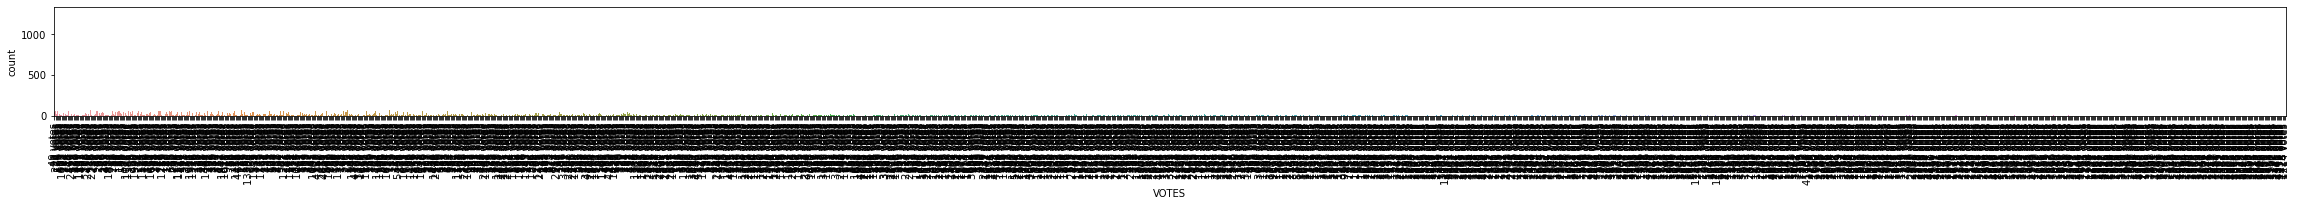

In [28]:
plt.figure(figsize=(40,2))
sns.countplot(df['VOTES'])
plt.xticks(rotation=90)
print((df['VOTES'].value_counts()).head())

* The most commom top 3 ratings of the restaurant are 44 votes i.e 1275, 28 votes i.e 66 & 29 votes i.e 66.

In [29]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [30]:
column=['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY','RATING', 'VOTES']

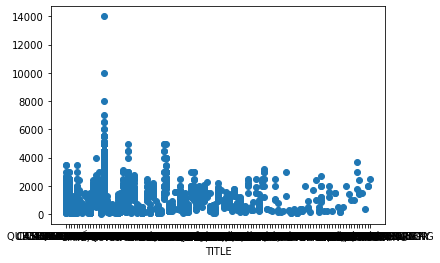

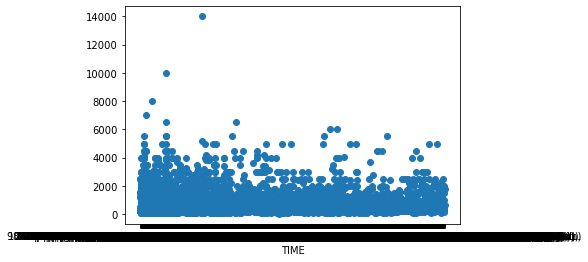

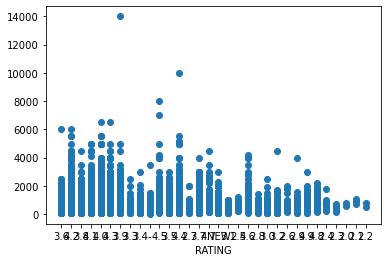

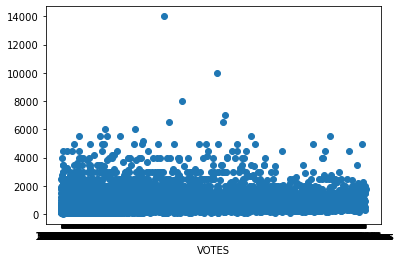

<Figure size 432x288 with 0 Axes>

In [31]:
for i in column:
    plt.scatter(df[i],df['COST'])
    plt.xlabel(i)
    plt.figure()

In [32]:
# Categorical data is converted into numerical data.

In [33]:
 from sklearn import preprocessing

le=preprocessing.LabelEncoder()

list=['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY','RATING', 'VOTES'];

for val in list:
    df[val]=le.fit_transform(df[val])

In [34]:
df.head()

TITLE  RESTAURANT_ID  CUISINES  TIME  CITY  LOCALITY  RATING  VOTES  COST
0     31           7196      2627   739   320       285      17   1278  1200
1     33          10075       289  1885    67      1046      23    950  1500
2     31           8349      2976   661    67      1101      19    712   800
3     95           4876      4130   275   222       136      22    787   800
4     50          11747      1766   615   222       620      19    470   300

In [35]:
# To check Outliers with Boxplot methord

In [36]:
df.plot(kind='box',subplots=True)

TITLE               AxesSubplot(0.125,0.125;0.0731132x0.755)
RESTAURANT_ID    AxesSubplot(0.212736,0.125;0.0731132x0.755)
CUISINES         AxesSubplot(0.300472,0.125;0.0731132x0.755)
TIME             AxesSubplot(0.388208,0.125;0.0731132x0.755)
CITY             AxesSubplot(0.475943,0.125;0.0731132x0.755)
LOCALITY         AxesSubplot(0.563679,0.125;0.0731132x0.755)
RATING           AxesSubplot(0.651415,0.125;0.0731132x0.755)
VOTES            AxesSubplot(0.739151,0.125;0.0731132x0.755)
COST             AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

* The Boxplot methord shows the outliers are present in the dataset.

In [37]:
sns.pairplot(df)

In [38]:
# distplot

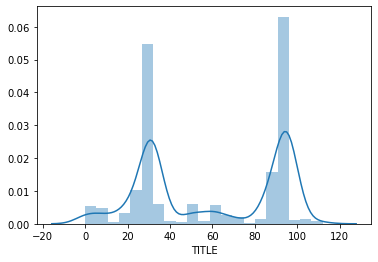

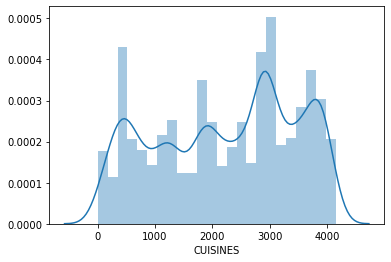

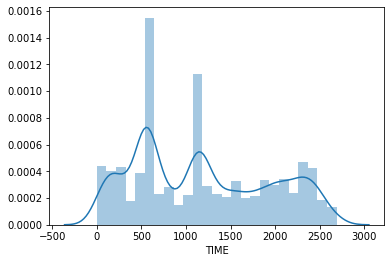

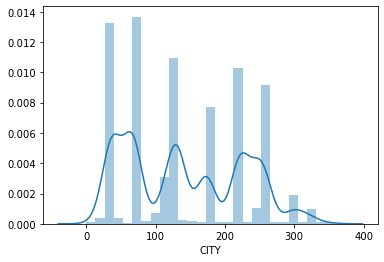

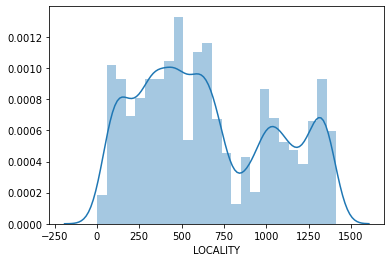

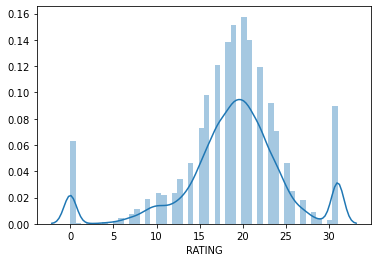

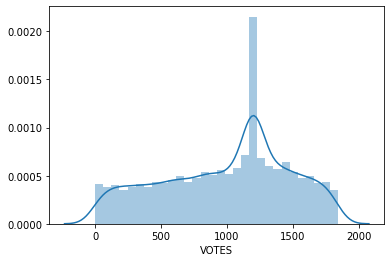

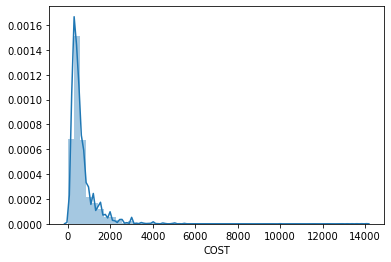

<Figure size 432x288 with 0 Axes>

In [39]:
for i in df.columns:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.figure()

In [40]:
df.skew()

TITLE           -0.069803
RESTAURANT_ID    0.003759
CUISINES        -0.218782
TIME             0.306186
CITY             0.266332
LOCALITY         0.352317
RATING          -0.803390
VOTES           -0.316806
COST             3.978801
dtype: float64

* The Pairplot & distplot shows the skewnees present in the dataset, df.skew() shows the mathematical representaion of the skewness present in the dataset.

In [41]:
# Remove Skewness

In [42]:
from sklearn.preprocessing import power_transform
print(power_transform(df))

[[-0.80731418  0.43515719  0.36259548 ... -0.37698853  0.59922888
   1.21936551]
 [-0.73810527  1.14190589 -1.69915027 ...  0.68696535 -0.06581979
   1.48002373]
 [-0.80731418  0.72669031  0.63150145 ... -0.03504301 -0.55750144
   0.71762142]
 ...
 [ 0.41666824  0.76839304 -0.0648309  ...  0.31986005  0.89954841
   1.31409224]
 [-0.80731418 -0.2440742   1.03019888 ... -0.54283042  0.02823668
  -0.23088518]
 [-0.80731418 -0.17923456  0.60859946 ... -0.70508652  1.05291653
   0.33841882]]


* The skewnees is removed from the dataset.

In [43]:
# Remove outliers

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.86888688, 0.36693474, 0.32540837, ..., 0.29054698, 0.59388432,
        0.86884552],
       [0.80783894, 1.20653238, 1.61638078, ..., 0.68015275, 0.08589126,
        1.34733058],
       [0.86888688, 0.70318207, 0.61526483, ..., 0.0330196 , 0.57914305,
        0.23086546],
       ...,
       [0.35207201, 0.75246724, 0.12224961, ..., 0.35658617, 0.9047573 ,
        1.02834054],
       [0.86888688, 0.35571999, 1.055448  , ..., 0.45233026, 0.00944312,
        0.40711461],
       [0.86888688, 0.2906869 , 0.59034881, ..., 0.61411355, 1.06433876,
        0.08812458]])

In [45]:
thresold=3
print(np.where(z>3))

(array([   13,    84,    85,   156,   178,   208,   235,   253,   308,
         329,   337,   369,   374,   379,   392,   396,   422,   428,
         438,   452,   453,   455,   469,   473,   480,   502,   508,
         563,   577,   604,   615,   625,   644,   690,   731,   749,
         751,   772,   787,   831,   838,   839,   874,   911,   919,
         949,   966,   967,   973,   981,   993,   994,  1009,  1054,
        1126,  1133,  1193,  1196,  1205,  1227,  1287,  1288,  1297,
        1345,  1365,  1366,  1395,  1468,  1470,  1472,  1475,  1502,
        1543,  1555,  1581,  1594,  1596,  1597,  1632,  1635,  1657,
        1696,  1701,  1711,  1748,  1759,  1764,  1778,  1792,  1806,
        1828,  1839,  1855,  1878,  1884,  1884,  1903,  1916,  1930,
        1931,  1983,  2025,  2039,  2053,  2082,  2092,  2096,  2100,
        2109,  2111,  2115,  2124,  2205,  2207,  2251,  2254,  2313,
        2327,  2333,  2339,  2349,  2369,  2407,  2434,  2439,  2459,
        2479,  2488

In [46]:
dn=df[(z<3).all(axis=1)]

In [47]:
print(df.shape ,'\t',dn.shape)

(12690, 9) 	 (11972, 9)


In [48]:
df=dn

* The outliers are removed from the data. The old rows are 12690 and new rows are 11972.

In [49]:
# Model Training

In [50]:
xn=df.drop(['COST'],axis=1)

In [51]:
y=df['COST']
y=pd.DataFrame(data=y)

In [52]:
# scaling the data

In [53]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(xn)
x=pd.DataFrame(x,columns=xn.columns)

In [54]:
# Finding the best random state for the linear Regression model.

In [55]:
max_r_score=0;
for r in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=r)
    ln=LinearRegression()
    ln.fit(x_train,y_train) 
    pred=ln.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2> max_r_score:
        max_r_score=r2;
        final_r_state=r;
print('max r2 score for random state:',final_r_state,"is:",max_r_score)

max r2 score for random state: 26 is: 0.2181904934058978


In [56]:
# the Linear Regression model is giving beat result at randaom state at 26.

In [57]:
print(x_train.shape ,'\t',y_train.shape)

(9338, 8) 	 (9338, 1)


In [58]:
print(x_test.shape ,'\t',y_test.shape)

(2634, 8) 	 (2634, 1)


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=26)

In [60]:
ln=LinearRegression()
ln.fit(x_train,y_train) 
pred=ln.predict(x_test)

In [61]:
ln.score(x_train,y_train)

0.1824350381986921

In [62]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

errors:
Mean absolute error: 273.4683450204534
Mean squared error: 149822.23339820252
Root mean squared error: 387.0687708898801


In [63]:
print(r2_score(y_test,pred))

0.2181904934058978


* The Linear Regression model is giving the r2 score of 0.1023.

In [64]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet   

In [65]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()];

In [66]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(m,'\n')
    print('errors:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm),'\n')
    print('Mean squared error:',mean_squared_error(y_test,predm),'\n')
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predm)),'\n')
    print('r2_score:',r2_score(y_test,predm),'\n')
    print('**********************************************************************************************************************')
    print('\n')

DecisionTreeRegressor() 

errors:
Mean absolute error: 224.7346241457859 

Mean squared error: 114604.97380410023 

Root mean squared error: 338.53356377780364 

r2_score: 0.401962872994466 

**********************************************************************************************************************


KNeighborsRegressor() 

errors:
Mean absolute error: 248.57289293849658 

Mean squared error: 132702.8933181473 

Root mean squared error: 364.2840832621531 

r2_score: 0.3075234483194186 

**********************************************************************************************************************


SVR() 

errors:
Mean absolute error: 260.28291354418536 

Mean squared error: 166309.99734470222 

Root mean squared error: 407.81122758538936 

r2_score: 0.13215325912176656 

**********************************************************************************************************************


Lasso() 

errors:
Mean absolute error: 273.3841748913994 

Mean squared error:

* The DecisionTreeRegressor model is giving the best r2 score i.e 0.3743.

In [67]:
# GridSearchCV is used for Hypertunning the Best model.

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
parameters={'criterion':['mse','friedman_mse', 'mae', 'poisson'],'random_state':(1,100)}

In [70]:
dtc=DecisionTreeRegressor()
clf=GridSearchCV(dtc,parameters)
clf.fit(x_train,y_train)
sorted(clf.cv_results_.keys())
print(clf.best_params_)

{'criterion': 'friedman_mse', 'random_state': 100}


* The best parameters for DecisionTreeRegressor models are 'criterion': 'friedman_mse' & 'random_state': 100.

In [71]:
dtr=DecisionTreeRegressor('friedman_mse',random_state=100)
dtr.fit(x_train,y_train) 
preddtr=dtr.predict(x_test)

In [72]:
 print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
print('Mean squared error:',mean_squared_error(y_test,preddtr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))

errors:
Mean absolute error: 225.57744874715263
Mean squared error: 116756.9859529233
Root mean squared error: 341.6972138501034


In [73]:
print(r2_score(y_test,preddtr))

0.3907331408105639


In [74]:
#Ensemble Techniques

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [76]:
# RandomForrestRegressor

In [77]:
rf=RandomForestRegressor(n_estimators=100,random_state=11)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)

0.9572580768515037

In [78]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

errors:
Mean absolute error: 174.32600987091874
Mean squared error: 64793.08192881549
Root mean squared error: 254.54485248933142


In [79]:
print(r2_score(y_test,predrf))

0.6618936571393668


* The Random Forest Regressor model r2 score is 0.6618.

In [80]:
# AdaBoostRegressor

In [81]:
ada=AdaBoostRegressor(base_estimator=dtc,n_estimators=50)
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
ada.score(x_train,y_train)

0.9986387209871976

In [82]:
print(r2_score(y_test,predada))

0.6518444233120054


* The AdaBoostRegressor model r2 score is 0.649.

In [83]:
# Cross Validation

In [84]:
rfscore=cross_val_score(rf,x,y,cv=5)
print(rfscore)

[0.7010295  0.66858866 0.67184145 0.68496922 0.72406746]


In [85]:
print(rfscore.mean(),rfscore.std())

0.6900992587506936 0.02047281016026898


In [86]:
# Plotting the predicted data and Y_test data

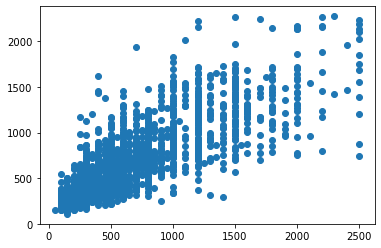

In [87]:
plt.scatter(y_test,predrf)

* The scatter plot shows the relation between y_test and predicted data.

In [88]:
# Saving the best model 

In [89]:
import joblib

In [90]:
joblib.dump(rf,'food_price_dataset.pkl')

['food_price_dataset.pkl']

# Test data

In [91]:
dt=pd.read_excel(r'D:\data\Data_Test.xlsx')
dt.head()

TITLE  RESTAURANT_ID                                      CUISINES  \
0  CASUAL DINING           4085         North Indian, Chinese, Mughlai, Kebab   
1    QUICK BITES          12680  South Indian, Fast Food, Pizza, North Indian   
2  CASUAL DINING           1411       North Indian, Seafood, Biryani, Chinese   
3           None            204                                       Biryani   
4    QUICK BITES          13453                          South Indian, Kerala   

                                                TIME       CITY      LOCALITY  \
0                      12noon – 12midnight (Mon-Sun)      Noida     Sector 18   
1                            7am – 12:30AM (Mon-Sun)     Mumbai    Grant Road   
2                           11am – 11:30pm (Mon-Sun)     Mumbai  Marine Lines   
3  9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...  Faridabad           NIT   
4                              11am – 10pm (Mon-Sun)      Kochi        Kaloor   

  RATING       VOTES  
0    4.3   564 votes  
1    4.2    61 votes  
2    3.8   350 votes  
3    3.8  1445 votes  
4    3.6    23 votes

In [92]:
dt.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [93]:
# Replace the Null values.

In [94]:
from sklearn.impute import SimpleImputer

In [95]:
imp=SimpleImputer(strategy='most_frequent')
dt['RATING']=imp.fit_transform(dt['RATING'].values.reshape(-1,1))

In [96]:
dt['VOTES']=imp.fit_transform(dt['VOTES'].values.reshape(-1,1))

In [97]:
dt['LOCALITY']=imp.fit_transform(dt['LOCALITY'].values.reshape(-1,1))

In [98]:
dt['CITY']=imp.fit_transform(dt['CITY'].values.reshape(-1,1))

In [99]:
dt.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

* Null values are removed from the dataset.

In [100]:
# Converting Categorical data into numerical data

In [101]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

list=['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY','RATING', 'VOTES'];

for val in list:
    dt[val]=le.fit_transform(dt[val])

In [102]:
dt.head()

TITLE  RESTAURANT_ID  CUISINES  TIME  CITY  LOCALITY  RATING  VOTES
0     23           1085      1293   503   110       662      23    823
1     75           3374      1632   933    96       221      22    871
2     23            347      1455   219    96       411      18    575
3     66             42       208  1071    41       456      18    179
4     75           3567      1637   208    78       300      16    394

In [103]:
# Removing outliers

In [104]:
from scipy.stats import zscore
z=np.abs(zscore(dt))
z

array([[0.86274202, 0.81797081, 0.73156489, ..., 1.18635981, 0.85679112,
        0.7135161 ],
       [1.10650341, 1.10099139, 1.41171242, ..., 0.69133711, 0.6947545 ,
        0.86399739],
       [0.86274202, 1.43666636, 1.05659114, ..., 0.11764796, 0.04660803,
        0.06397055],
       ...,
       [1.10650341, 0.19306825, 0.50032472, ..., 1.33112556, 0.11542859,
        0.60692519],
       [1.10650341, 0.2965228 , 1.22913594, ..., 0.21871952, 2.87005111,
        0.83264712],
       [1.10650341, 1.21115267, 0.43462733, ..., 0.83721889, 0.11542859,
        0.91415782]])

In [105]:
thresold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [106]:
dtn=dt[(z<3).all(axis=1)]

In [107]:
print(dt.shape ,'\t',dtn.shape)

(4231, 8) 	 (4231, 8)


*  No Outliers are present in the dataset.

In [108]:
# Removing Skewnees

In [109]:
from sklearn.preprocessing import power_transform
print(power_transform(dtn))

[[-0.79111974 -0.73474787  0.73798189 ...  1.127331    0.88721747
   0.72179633]
 [ 1.06449161  1.05644577  1.34731258 ... -0.57420172  0.70086418
   0.85727198]
 [-0.79111974 -1.54080115  1.03204124 ...  0.25747028 -0.01694727
  -0.00347953]
 ...
 [ 1.06449161  0.27910571 -0.44182906 ...  1.23309792 -0.18904491
   0.62497786]
 [ 1.06449161 -0.18477122  1.18595834 ... -0.06217163 -2.44365204
   0.82916073]
 [ 1.06449161 -1.21517828  0.4640594  ...  0.86205796 -0.18904491
   0.90213002]]


* The skewness in the dataset is removed.

In [110]:
# Scaling the test data

In [111]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(dtn)
x=pd.DataFrame(x,columns=dtn.columns)

In [112]:
x.head()

TITLE  RESTAURANT_ID  CUISINES      TIME      CITY  LOCALITY    RATING  \
0 -0.862742      -0.817971  0.731565 -0.059086  1.336371  1.186360  0.856791   
1  1.106503       1.100991  1.411712  1.203765  0.974641 -0.691337  0.694755   
2 -0.862742      -1.436666  1.056591 -0.893156  0.974641  0.117648  0.046608   
3  0.765672      -1.692360 -1.445308  1.609053 -0.446444  0.309250  0.046608   
4  1.106503       1.262791  1.421744 -0.925461  0.509558 -0.354970 -0.277465   

      VOTES  
0  0.713516  
1  0.863997  
2 -0.063971  
3 -1.305441  
4 -0.631410

In [113]:
# Loading the best model

In [114]:
load_model=joblib.load('food_price_dataset.pkl')

In [115]:
# loading test data in the best moodel

In [116]:
final_output=load_model.predict(x)

In [117]:
final_output

array([1108. ,  343.5,  763.5, ...,  333.5,  390.5,  349.2])

In [118]:
final_output=pd.DataFrame(data=final_output)

In [119]:
final_output.head()

0
0  1108.0
1   343.5
2   763.5
3   513.5
4   412.5